# Machine Learning for Author ID

From: https://github.com/ksatola

## Description
Use a Support Vector Machines (SVM) classifier to classify (create decision boundary) between points representing car sensors readings about the road condisions (features: grade, bumpiness) to decide if the should slow down or acelerate.

## Origin
This is Python 3 version of a mini-project from [Udacity's Intro to Machine Learning](https://classroom.udacity.com/courses/ud120) free course.

## Steps to prepare
none

## Additional Information
none

In [1]:
import sys
from time import time
from prep_terrain_data import makeTerrainData
import numpy as np
import pylab as pl

In [2]:
### features_train and features_test are the features for the training
### and testing datasets, respectively
### labels_train and labels_test are the corresponding item labels
features_train, labels_train, features_test, labels_test = makeTerrainData()

In [3]:
### the training data (features_train, labels_train) have both "fast" and "slow" points mixed
### in together--separate them so we can give them different colors in the scatterplot,
### and visually identify them
grade_fast = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==0]
bumpy_fast = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==0]
grade_slow = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==1]
bumpy_slow = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==1]

In [4]:
from sklearn import svm

In [5]:
# Measure time
t0 = time()

# Fit the model
clf = svm.SVC(kernel='rbf', gamma='scale', C=10000)#(kernel='linear')
clf.fit(features_train, labels_train)

print("Training time: {} seconds.".format(round(time()-t0, 3)))

Training time: 0.03 seconds.


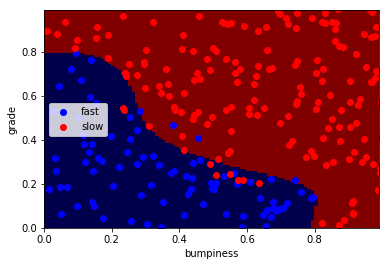

In [6]:
### draw the decision boundary with the text points overlaid
from class_vis import prettyPicture
prettyPicture(clf, features_test, labels_test, '04_SVM2.png')

In [7]:
# Measure time
t0 = time()

# Predict
pred = clf.predict(features_test)

print("Training time: {} seconds.".format(round(time()-t0, 3)))

Training time: 0.001 seconds.


In [8]:
# What is a predicted value for a specific observation in the features_test
obs = 50
answer = pred[obs] # zero-based index
print("Predicted outcome for {} is {}.".format(obs, answer))

Predicted outcome for 50 is 1.0.


In [9]:
# How many for Sara and Chris?
import numpy as np
unique, counts = np.unique(pred, return_counts=True)
for x in range(len(unique)):
    print("Unique value: {} occurs {} time(s).".format(x, counts[x]))

Unique value: 0 occurs 87 time(s).
Unique value: 1 occurs 163 time(s).


In [10]:
# Calculate accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(pred, labels_test)
accuracy

0.948

In [11]:
# Save the Model for later use

model_filename = '04_SVM2.model'

# Save the model to disk (serialize model on disk)
import pickle
pickle.dump(clf, open(model_filename, 'wb'))

In [12]:
# Load the model from disk (and perform predictions on a model without train data)
model = pickle.load(open(model_filename, 'rb'))
result = model.score(features_test, labels_test)
result

0.948